Trying Elliptic Envelope
Trying GMM (2, full)
Trying GMM (4, full)
Trying Baysian GMM 


/home/jon/projects/machinehearing/handson/constrained-hmm/venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 4 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Trying Elliptic Envelope
Trying GMM (2, full)
Trying GMM (4, full)
Trying Baysian GMM 


/home/jon/projects/machinehearing/handson/constrained-hmm/venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 4 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Trying Elliptic Envelope
Trying GMM (2, full)
Trying GMM (4, full)
Trying Baysian GMM 


/home/jon/projects/machinehearing/handson/constrained-hmm/venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 4 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Trying Elliptic Envelope
Trying GMM (2, full)
Trying GMM (4, full)
underflow encountered in exp
Trying Baysian GMM 


/home/jon/projects/machinehearing/handson/constrained-hmm/venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 4 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


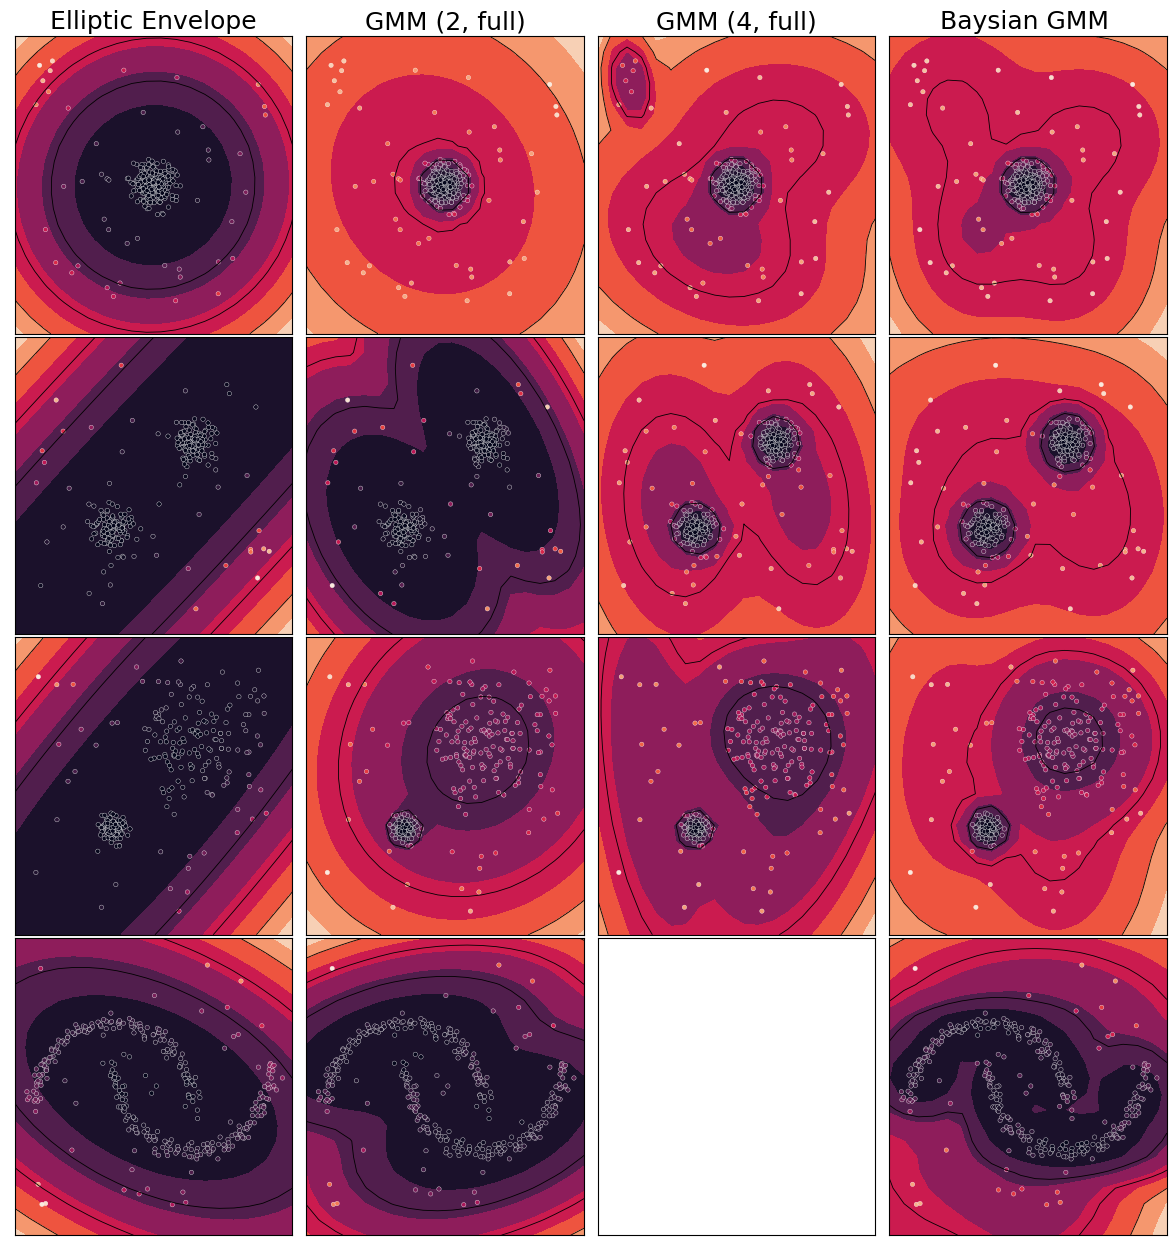

In [3]:

import anomaly_detection


In [4]:

import pomegranate



In [11]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class UniformGaussianMixture(BaseEstimator, ClusterMixin):
    """
    Gaussian Mixture Model (GMM) with Uniform background component to handle noisy data
    
    References:
    1. Unsupervised Learning of GMM with a Uniform Background Component. https://arxiv.org/abs/1804.02744
    2. Filling the gaps: Gaussian mixture models from noisy, truncated or incomplete sample https://arxiv.org/abs/1611.05806
    """
    def __init__(self, n_components=1):
        self.n_components = n_components

    def fit(self, X, y=None):

        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        # Store the classes seen during fit
        #self.classes_ = unique_labels(y)

        from pomegranate import \
            GeneralMixtureModel, \
            NormalDistribution, \
            MultivariateGaussianDistribution, \
            UniformDistribution

        n_features = X.shape[1]
        dists = [
            UniformDistribution
        ]
        # FIXME: support MultiVariateGaussian. Currently crashes Python
        for c in range(n_features):
            dists.append(NormalDistribution)
        self.model_ = GeneralMixtureModel.from_samples(dists, n_components=len(dists), X=X)
        
        # Return the classifier
        return self

    def predict(self, X):

        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

model = UniformGaussianMixture()


In [12]:
datasets = anomaly_detection.make_datasets()
model.fit(datasets[0])

ValueError: must pass in a list with one distribution per dimension in multivariate data or multiple distributions for univariate data.

In [ ]:
#pomegranate.GeneralMixtureModel.from_samples([pomegranate.MultivariateGaussianDistribution, pomegranate.MultivariateGaussianDistribution], n_components=2, X=datasets[0])


In [5]:

#pomegranate.GeneralMixtureModel.from_samples([pomegranate.UniformDistribution, pomegranate.MultivariateGaussianDistribution], n_components=2, X=datasets[0])


pomegranate.GeneralMixtureModel.from_samples([pomegranate.UniformDistribution, pomegranate.NormalDistribution], n_components=2, X=datasets[0])




{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "UniformDistribution",
                        "parameters" : [
                            -5.933734594516771,
                            1.3422347366685532
                        ],
                        "frozen" : false
                    },
                    {
                        "class" : "Distribution",
                        "name" : "NormalDistribution",
                        "parameters" : [
                            -0.03980874785421397,
                            3.2153616425694898
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0,
            